In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Signal Patterns 

In [2]:
def HorizontalSine(shape, wavelength):
  X, Y = np.meshgrid(np.arange(0, shape[0], 1), np.arange(0, shape[1], 1))
  return np.sin(2 * np.pi * X / wavelength)

def VerticalSine(shape, wavelength):
  X, Y = np.meshgrid(np.arange(0, shape[0], 1), np.arange(0, shape[1], 1))
  return np.sin(2 * np.pi * Y / wavelength)

def DiagonalSine(shape, wavelength, angle = np.pi / 4):
  X, Y = np.meshgrid(np.arange(0, shape[0], 1), np.arange(0, shape[1], 1))
  return np.sin( 2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength)

def Gauss(shape, A=1):
  x_mean = int(shape[0]/2)
  y_mean = int(shape[1]/2)
  x_sigma = int(shape[0]/32)
  y_sigma = int(shape[1]/32)
  X, Y = np.meshgrid(np.arange(0, shape[0], 1), np.arange(0, shape[1], 1))
  return A*np.exp(-((X-x_mean)**2/(2*x_sigma**2)+(Y-y_mean)**2/(2*y_sigma**2)))

def Circle(shape, r=10): #Lowpass
  X, Y = np.meshgrid(np.arange(0, shape[0], 1), np.arange(0, shape[1], 1))
  x_center = int(shape[0]/2)
  y_center = int(shape[1]/2)
  image = np.sqrt((X-x_center)**2 + (Y-y_center)**2)
  return image <= r # all values smaller or equal as r are set true

def NegativeCircle(shape, r=10): #Highpass
  X, Y = np.meshgrid(np.arange(0, shape[0], 1), np.arange(0, shape[1], 1))
  x_center = int(shape[0]/2)
  y_center = int(shape[1]/2)
  image = np.sqrt((X-x_center)**2 + (Y-y_center)**2)
  return image > r # all values bigger as r are set true

def Rect(shape, height = 30, width = 10):
  image = np.zeros(shape)
  x_min = int(shape[0]/2 - width/2)
  x_max = int(shape[0]/2 + width/2)
  y_min = int(shape[1]/2 - height/2)
  y_max = int(shape[1]/2 + height/2)
  image[y_min:y_max,x_min:x_max]=1
  return image

def VerticalRect(shape):
  return Rect(shape, shape[0]/4,shape[1]/8)

def HorizontalRect(shape):
  return Rect(shape, shape[0]/8,shape[1]/4)

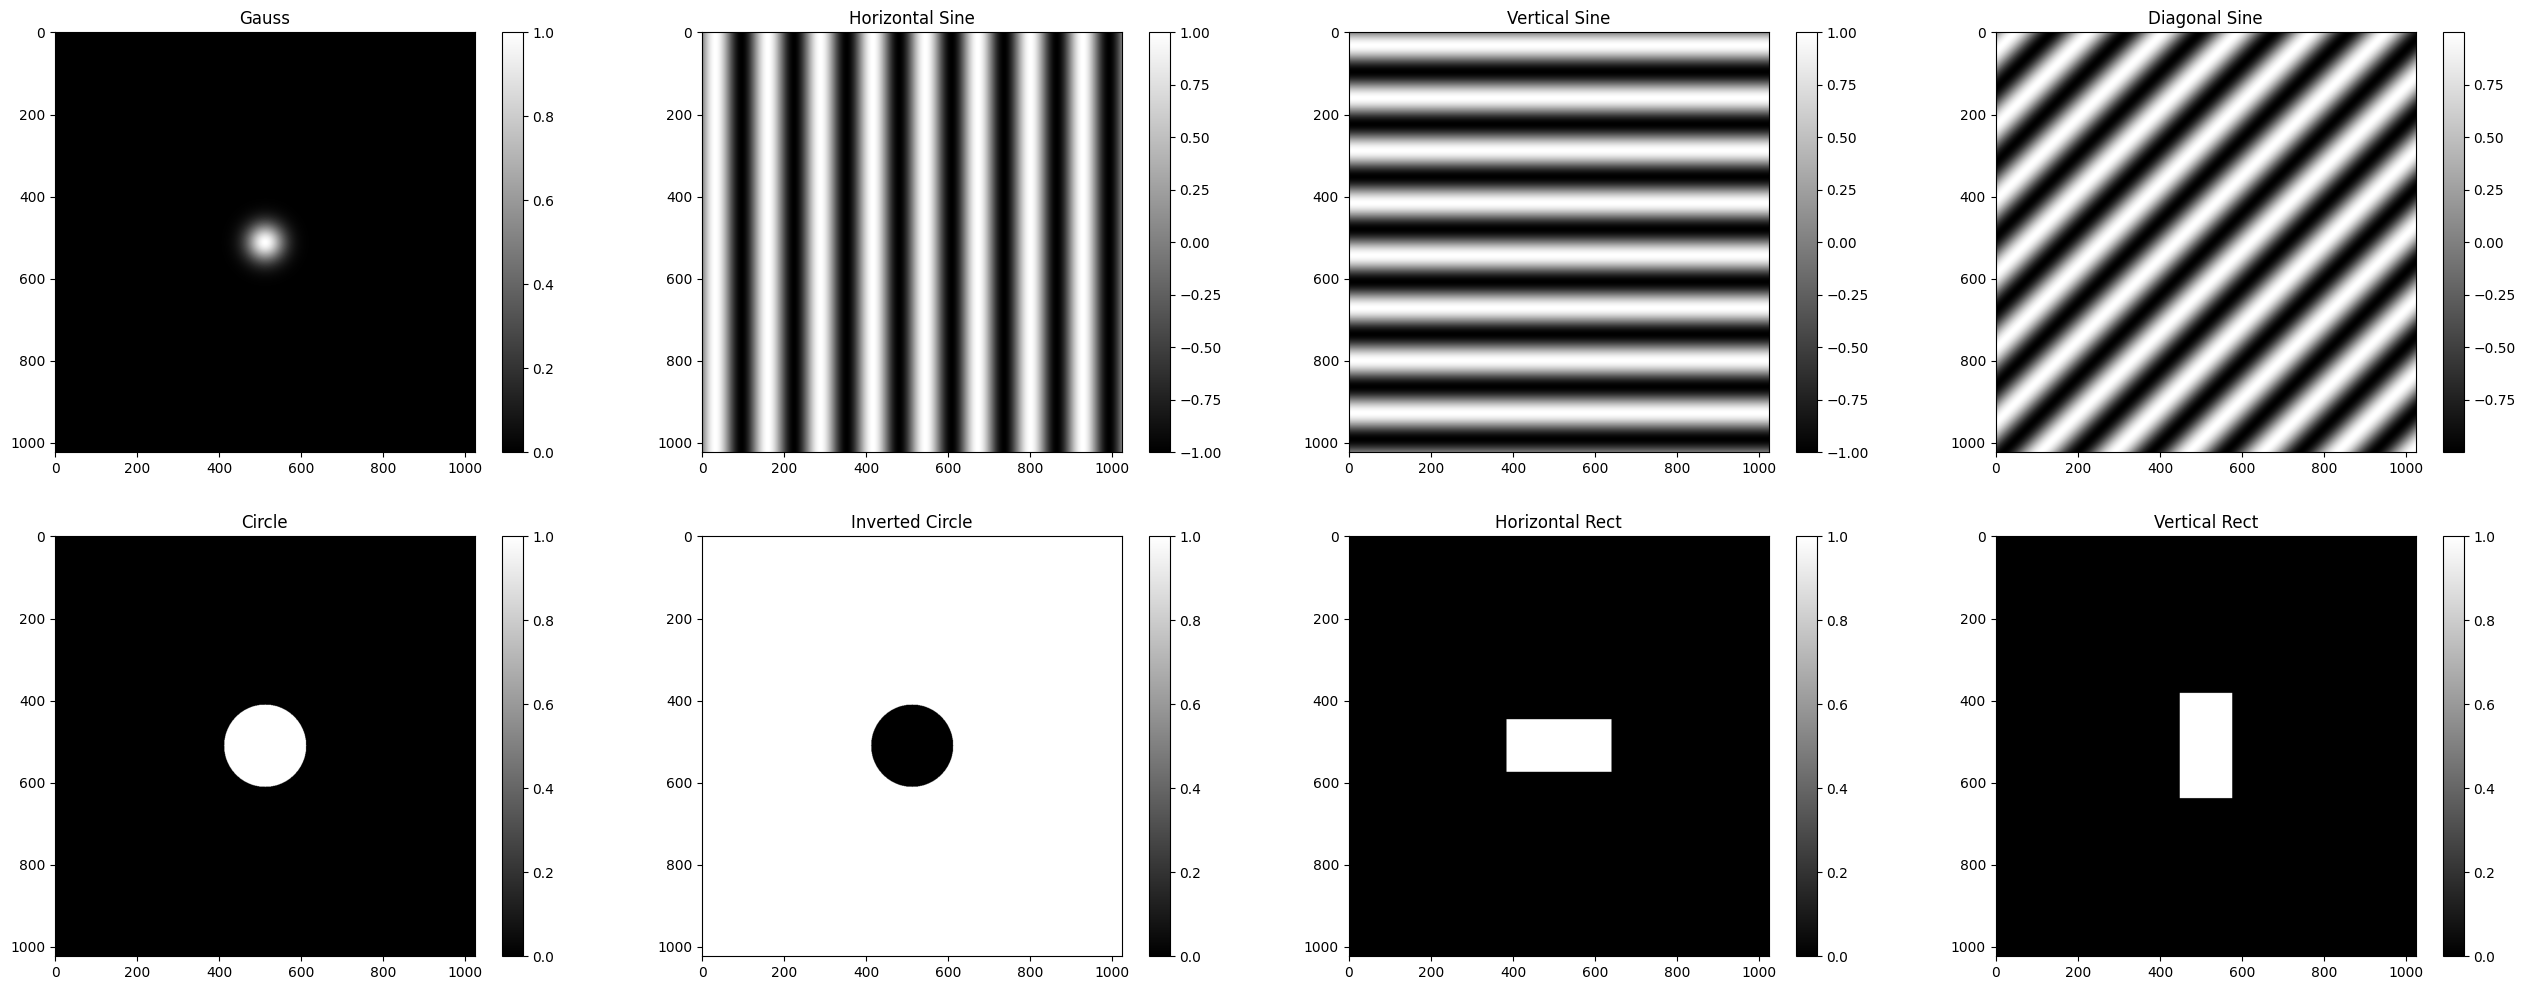

In [3]:
fig = plt.figure(figsize=[32,12])

ax = fig.add_subplot(2, 4, 1)
ax.set_title('Gauss')
plt.imshow(Gauss((1024,1024)), cmap='gray')
plt.colorbar()

ax = fig.add_subplot(2, 4, 2)
ax.set_title('Horizontal Sine')
plt.imshow(HorizontalSine((1024,1024),wavelength=128), cmap='gray')
plt.colorbar()

ax = fig.add_subplot(2, 4, 3)
ax.set_title('Vertical Sine')
plt.imshow(VerticalSine((1024,1024),wavelength=128), cmap='gray')
plt.colorbar()

ax = fig.add_subplot(2, 4, 4)
ax.set_title('Diagonal Sine')
plt.imshow(DiagonalSine((1024,1024),wavelength=128), cmap='gray')
plt.colorbar()

ax = fig.add_subplot(2, 4, 5)
ax.set_title('Circle')
plt.imshow(Circle((1024,1024),r=100), cmap='gray')
plt.colorbar()

ax = fig.add_subplot(2, 4, 6)
ax.set_title('Inverted Circle')
plt.imshow(NegativeCircle((1024,1024),r=100), cmap='gray')
plt.colorbar()

ax = fig.add_subplot(2, 4, 7)
ax.set_title('Horizontal Rect')
plt.imshow(HorizontalRect((1024,1024)), cmap='gray')
plt.colorbar()

ax = fig.add_subplot(2, 4, 8)
ax.set_title('Vertical Rect')
plt.imshow(VerticalRect((1024,1024)), cmap='gray')
plt.colorbar()

plt.show()

In [4]:
from . import plot_tools

ImportError: attempted relative import with no known parent package